# Basic Teleportation

![Basic Teleportation](img/basic_teleportation.png "Basic Teleportation")

![Basic Teleportation](img/basic_teleportation-1.png "Basic Teleportation")

In [1]:
from IPython.display import IFrame
IFrame(src='http://oreilly-qc.github.io?p=4-1', width=900, height=900)

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline

In [3]:
## Example 4-1: Basic Teleportation

# Set up the program
alice = QuantumRegister(1, name='alice')
ep    = QuantumRegister(1, name='ep')
bob   = QuantumRegister(1, name='bob')
alice_c = ClassicalRegister(1, name='alicec')
ep_c    = ClassicalRegister(1, name='epc')
bob_c   = ClassicalRegister(1, name='bobc')
qc = QuantumCircuit(alice, ep, bob, alice_c, ep_c, bob_c)

In [4]:
# entangle
qc.h(ep)
qc.cx(ep, bob)
qc.barrier()

In [5]:
# prep payload
qc.reset(alice)
qc.h(alice)
qc.rz(math.radians(45), alice)
qc.h(alice)
qc.barrier()

In [6]:
# send
qc.cx(alice, ep)
qc.h(alice)
qc.measure(alice, alice_c)
qc.measure(ep, ep_c)
qc.barrier()

In [7]:
# receive
qc.x(bob).c_if(ep_c, 1)
qc.z(bob).c_if(alice_c, 1)

In [8]:
# verify
qc.h(bob)
qc.rz(math.radians(-45), bob)
qc.h(bob)
qc.measure(bob, bob_c)

In [9]:
## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

In [10]:
counts = result.get_counts(qc)
print('counts:',counts)

counts: {'0 1 1': 1}


[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


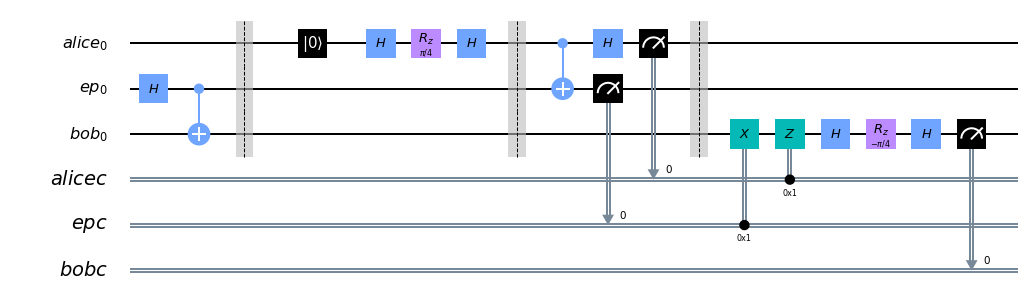

In [11]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw(output='mpl')        # draw the circuit